<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB
Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64
             Age      Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  \
count  200.00000  200.000000       200.000000   200.000000     200.000000   
mean    43.42500    0.555000        70.450000     0.555000       0.555000   
std     14.94191    0.498213        29.897438     0.498213       0.498213   
min     18.00000   

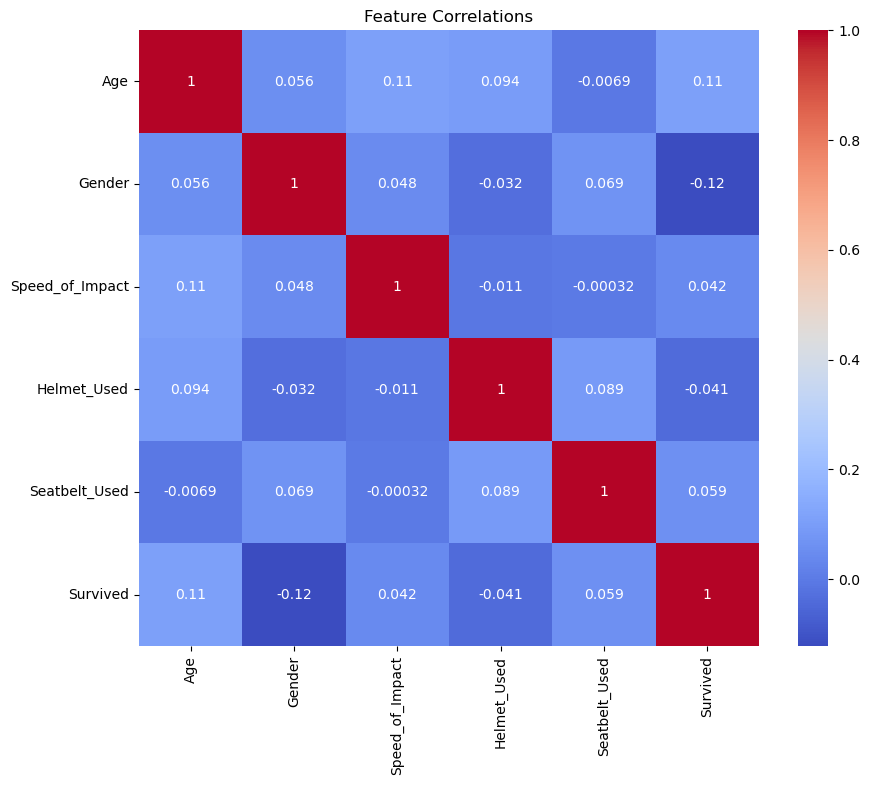

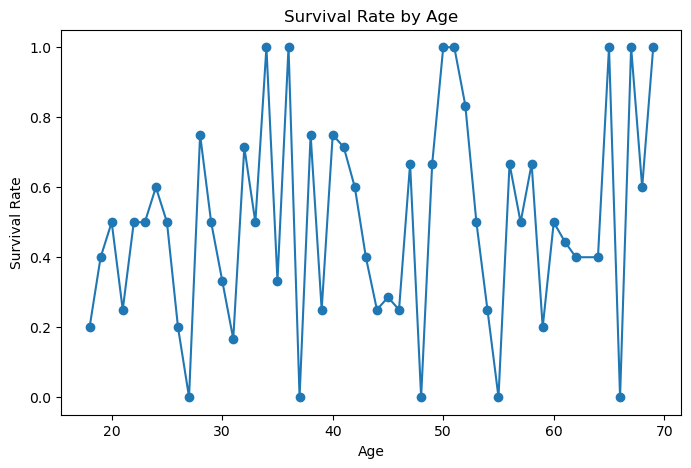

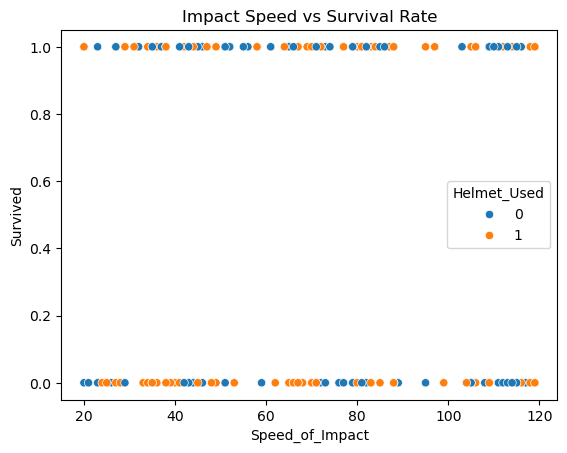

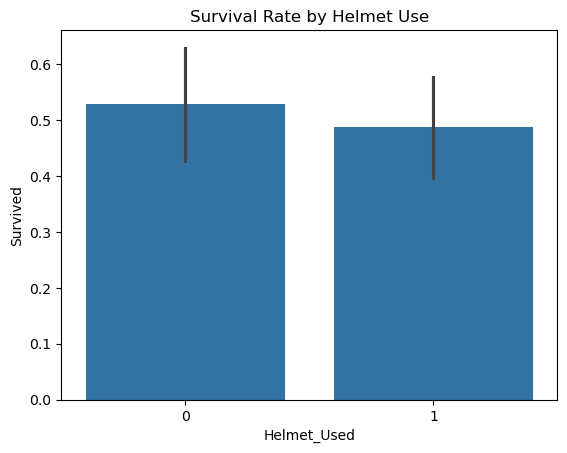

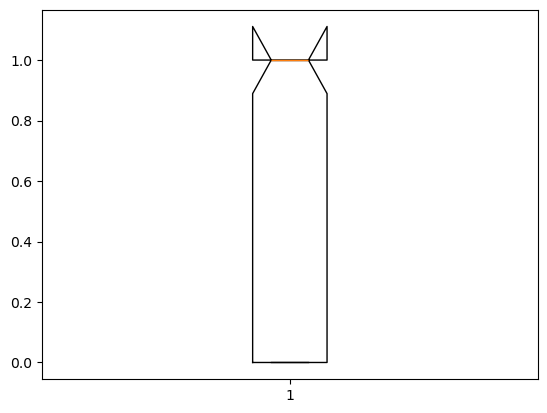

C:\Users\Gidayi\AppData\Local\Temp\ipykernel_7664\2625900793.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(accident.index, rotation=90)


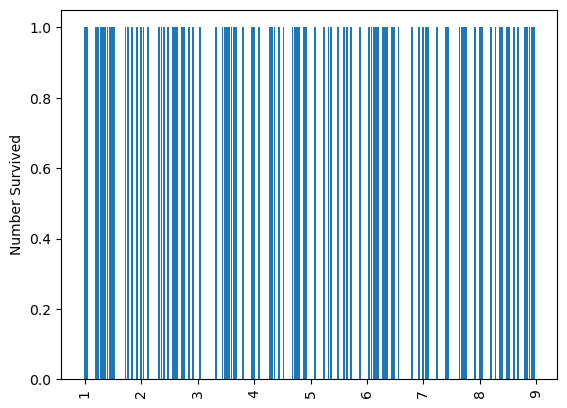

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

accident = pd.read_csv("accident.csv")

accident.info()
accident.head()
print(accident.isnull().sum())
accident

accident.loc[:, "Gender"] = accident["Gender"].fillna(accident["Gender"].mode()[0])
accident["Speed_of_Impact"] = accident["Speed_of_Impact"].fillna(accident["Speed_of_Impact"].median())

accident["Gender"] = accident["Gender"].map({"Male": 0, "Female": 1})
accident["Helmet_Used"] = accident["Helmet_Used"].map({"Yes": 1, "No": 0})
accident["Seatbelt_Used"] = accident["Seatbelt_Used"].map({"Yes": 1, "No": 0})

print(accident.describe())
plt.figure(figsize=(10, 8))
sns.heatmap(accident.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

accident.groupby("Age")["Survived"].mean().plot(kind="line", marker="o", figsize=(8, 5))
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.show()

sns.scatterplot(x=accident["Speed_of_Impact"], y=accident["Survived"], hue=accident["Helmet_Used"])
plt.title("Impact Speed vs Survival Rate")
plt.show()

sns.barplot(x="Helmet_Used", y="Survived", data=accident)
plt.title("Survival Rate by Helmet Use")
plt.show()

plt.boxplot(accident["Gender"], 0.4)
plt.show()

fig, ax = plt.subplots()
ax.bar(accident.index, accident["Survived"])
ax.set_xticklabels(accident.index, rotation=90)
ax.set_ylabel("Number Survived")
plt.show()

fig, ax = plt.subplots()
ax.bar(accident.index, accident["Survived"])
ax.set_xticklabels(accident.index, rotation=90)
ax.set_ylabel("Number Survived")
fig.savefig("survived.png")
fig.set_size_inches([5, 3], quality = 50, dpi = 300)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
X = accident.drop(columns=["Survived"])
y = accident["Survived"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
